In [58]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
df= pd.DataFrame(boston.data,columns = boston.feature_names)
df['Price']=boston.target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

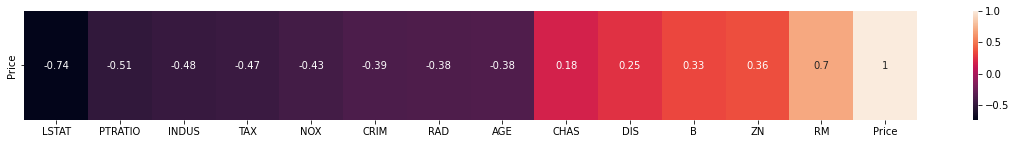

In [22]:
corr = df.corr().tail(1).sort_values('Price',axis=1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

In [25]:
x = df.drop(['Price'],axis=1)
y = df['Price']

<AxesSubplot:>

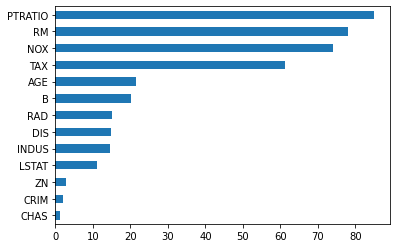

In [31]:
vif_list =[]

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = boston.feature_names)
s1.sort_values().plot(kind ='barh')

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [34]:
# Evaluation on Testing
y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

33.448979997676524
5.783509315085134
3.8429092204445046
0.589222384918251


In [36]:
#Evaluation on training
y_pred_train = lin_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

19.326470203585725
4.396188144698282
3.10315639657944
0.7730135569264234


<AxesSubplot:>

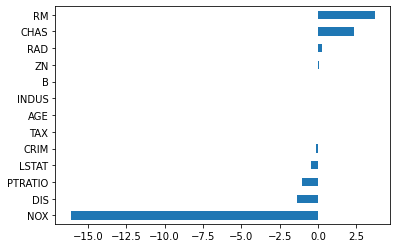

In [54]:
s3 = pd.Series(lin_model.coef_,index =x.columns)
s3.sort_values().plot(kind ='barh')

In [44]:
ridge_model =Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)

Ridge()

In [45]:
# Evaluation on Testing
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

34.231606110615374
5.850778248285896
3.836948822289121
0.5796111714164923


In [46]:
#Evaluation on training
y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

19.487180016696627
4.414428617238773
3.1012592049669805
0.7711260446978171


In [47]:
lasso_model =Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)

Lasso()

In [48]:
# Evaluation on Testing
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

41.70009679994901
6.457561211475197
4.3151787451059365
0.48789271561192593


In [49]:
#Evaluation on training
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

24.09169519304297
4.908329165107305
3.478159641248131
0.7170467166597749


<AxesSubplot:>

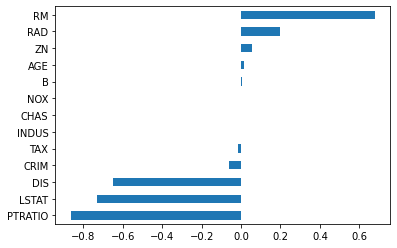

In [53]:
s2 =pd.Series(lasso_model.coef_,index = x.columns)
s2.sort_values().plot(kind ='barh')

In [ ]:
#Hyper PArameter Tuning
1 Randomizedsearchcv
2 Grid searchcv

In [ ]:
#Ridge Regression with Hyper PArameter tuning

In [59]:
ridge_model = Ridge()
param_grid ={'alpha':np.arange(0.01,3,0.01)}

gscv_ridge_model=GridSearchCV(ridge_model,param_grid,cv=5)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.01)

In [60]:
lasso_model = Lasso()
param_grid ={'alpha':np.arange(0.01,3,0.01)}

gscv_lasso_model=GridSearchCV(lasso_model,param_grid,cv=5)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [61]:
ridge_model =Ridge(alpha=0.01)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [62]:
#Ridge After hyper Parameter Tuning

# Evaluation on Testing
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

33.459000941697845
5.7843755878830905
3.842488941299595
0.5890993204933795


In [63]:
#Evaluation on training
y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

19.32652619214136
4.396194512546204
3.1026592103960366
0.773012899349382


In [64]:
lasso_model =Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [65]:
# Evaluation on Testing
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

33.79293373340055
5.813168992331167
3.8305914752983656
0.5849983848061701


In [66]:
#Evaluation on training
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

19.364725971259105
4.400537009418181
3.096399960489256
0.7725642487734209
